In [ ]:
#!/usr/bin/env python
# coding: utf-8

#                                  Yoga Pose image classification 

##                                  Problems and challenges:

-Problem:


automatically classifying images of people doing yoga poses int different categories -> image recognition problem
classification model: analyze the images and classify them according to their specific yoga pose => Image recognition algorithm {CNN}

-Challenge:

#### Similar Poses -> subtle changes => Collect large number of labeled images 

##                                 Data requirements:

###### sufficient variation:


diverse range of yoga poses, performed by individuals of different ages, genders, and body types, in different settings and environments. we are having

###### Annotation:


The dataset should be annotated with labels indicating the names of the yoga poses, so that the model can be trained to recognize and classify the poses accurately.

###### Sufficient quantity:


The dataset should be large enough to provide sufficient training examples for the model to learn from. A larger dataset would generally lead to better model performance.

###### Balanced:


The dataset should have a balanced distribution of examples across different classes or yoga poses, so that the model does not become biased towards certain poses.

###### Pre-processing:


The dataset may require pre-processing, such as resizing, cropping, or normalization, to ensure that the images or videos are of uniform size and format, and that the model can handle them effectively.

##                                  Data Collecting:  

the data was collected from a forwarded folder "YOGA" containing 2 sets one for the training which contains 5 yoga positions supported with images for each position and second folder for the testing respectively

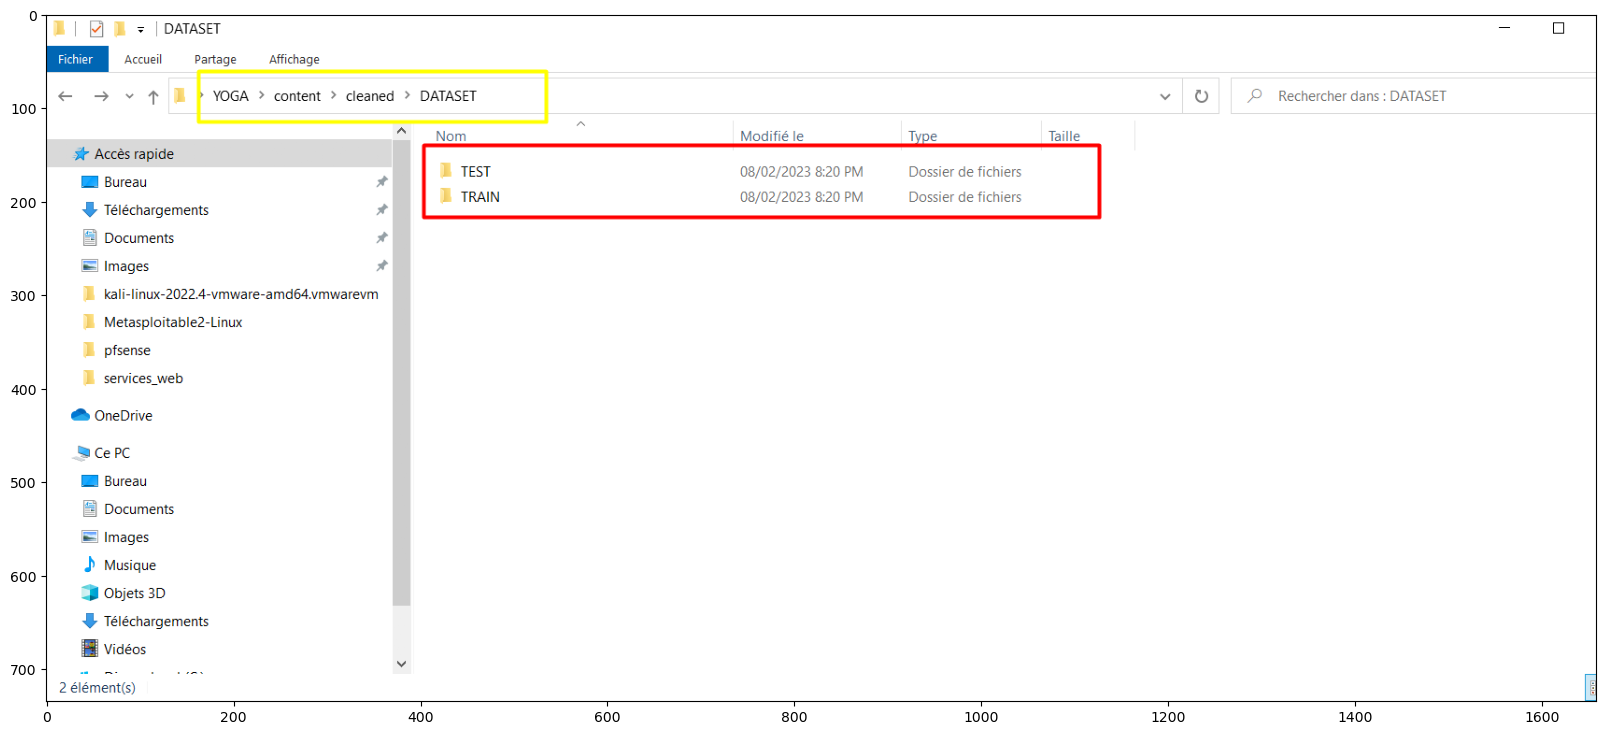

In [57]:
import matplotlib.image as mpimg

img = mpimg.imread(r'C:\Users\AHMED\Documents\Lightshot\Screenshot_1.png')
fig, ax = plt.subplots()
fig.set_size_inches(20, 16)
plt.imshow(img)
plt.show()

##                                  Data Understanding:  

#### data: yoga positions images

##### ~~5 poses:

 -downdog


-goddess


-plank 

-tree 



-warrior

##### the given data is divided into two : Training set and Testing set 

###### Training: 

Downdog: 223
goddess: 178
plank: 264
tree: 160
warrior2: 250

###### Testing: 


Downdog: 94
goddess: 77
plank: 110
tree: 68
warrior2: 109

### Importation: 


In [1]:
import pandas as pd
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle           
from tqdm import tqdm
from PIL import Image
from PIL import ImageFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
ImageFile.LOAD_TRUNCATED_IMAGES = True
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', 'Completer.use_jedi = False')

### Loading data: 

In [2]:
traindir = 'C:/Users/AHMED/Desktop/YOGA/content/cleaned/DATASET/TRAIN'
validdir = 'C:/Users/AHMED/Desktop/YOGA/content/cleaned/DATASET/TEST'

In [3]:
print('Number of positions to be predicted in the training set : ',len(os.listdir(traindir)))
print('Number of positions to be predicted in the testing set : ',len(os.listdir(validdir)))

Number of positions to be predicted in the training set :  5
Number of positions to be predicted in the testing set :  5


# Visualization of the content of the training and testing folders  

In [4]:
class_names = os.listdir(traindir)
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

In [5]:
class_names

['downdog', 'goddess', 'plank', 'tree', 'warrior2']

In [6]:
class_names_label

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}

#### FROM THE TRAINING SET :

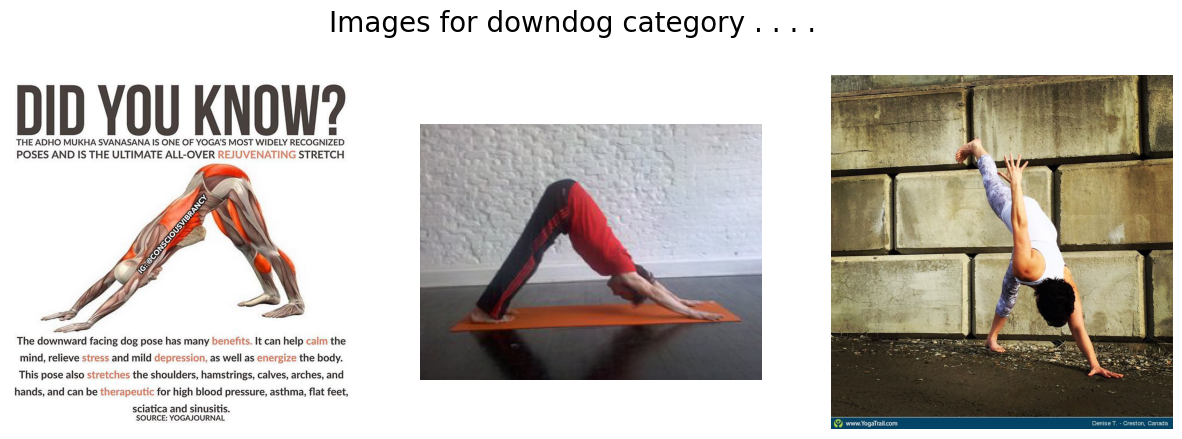

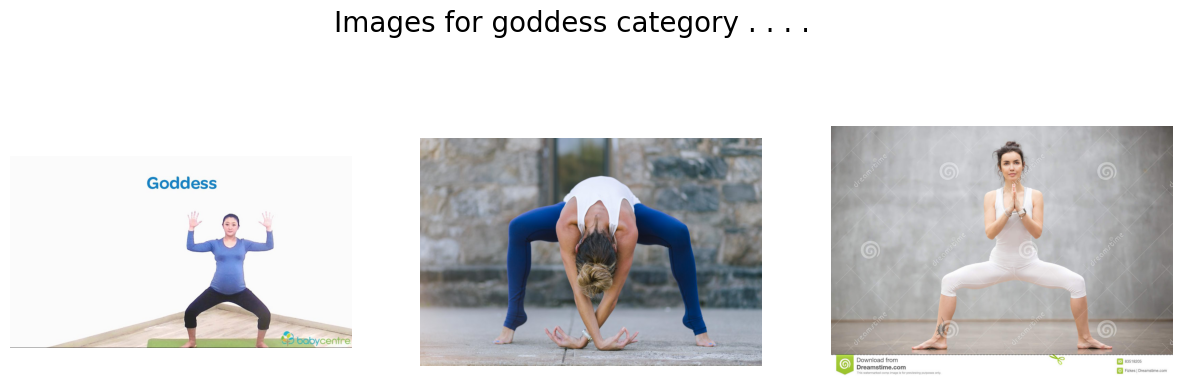

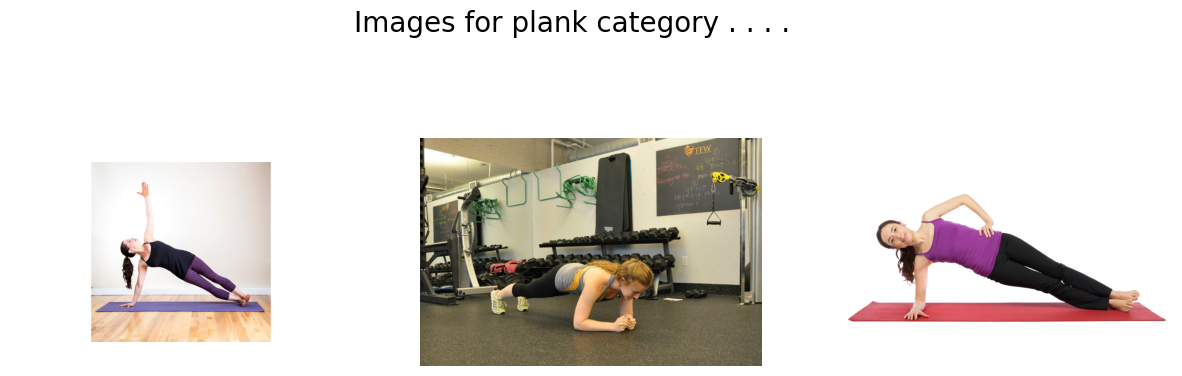

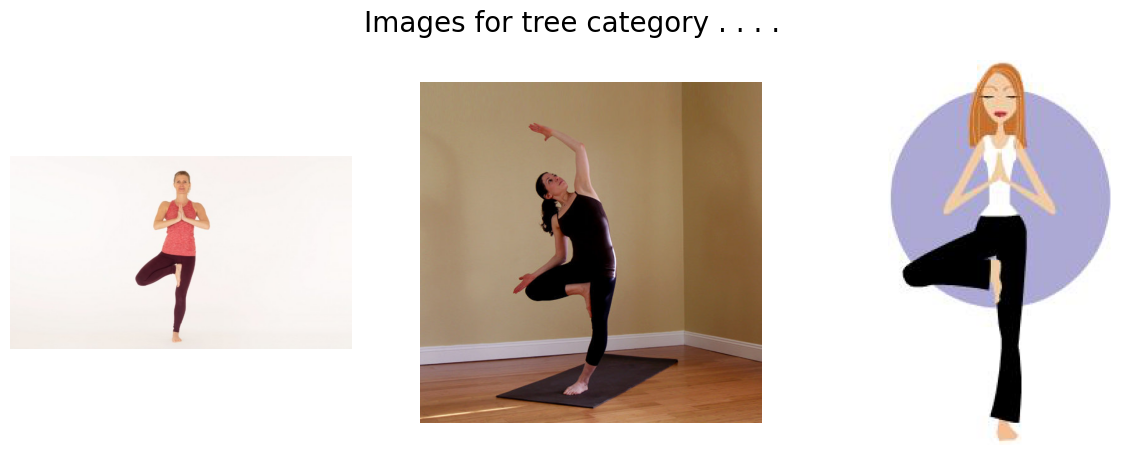

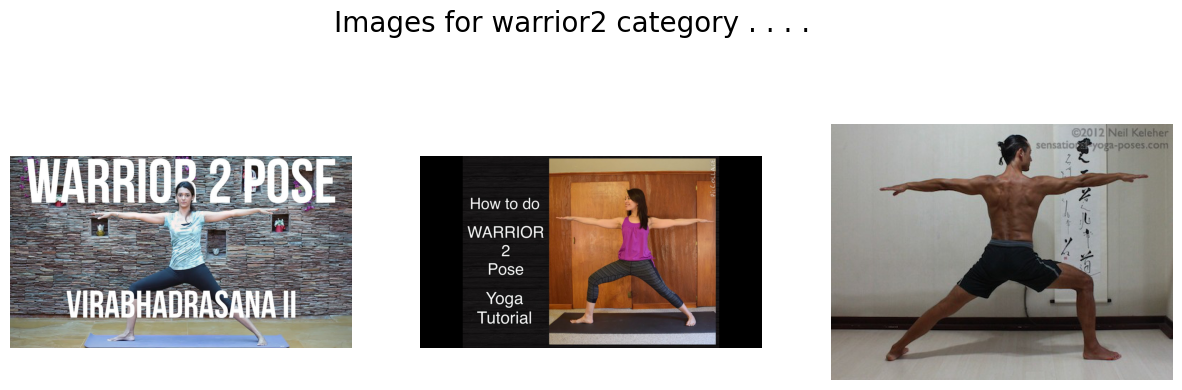

In [7]:
for pose in class_names:
    image_dir = f'{traindir}/{pose}'
    images = os.listdir(image_dir)
    images
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {pose} category . . . .', fontsize=20)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{traindir}/{pose}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

#### FROM THE TESTING SET :

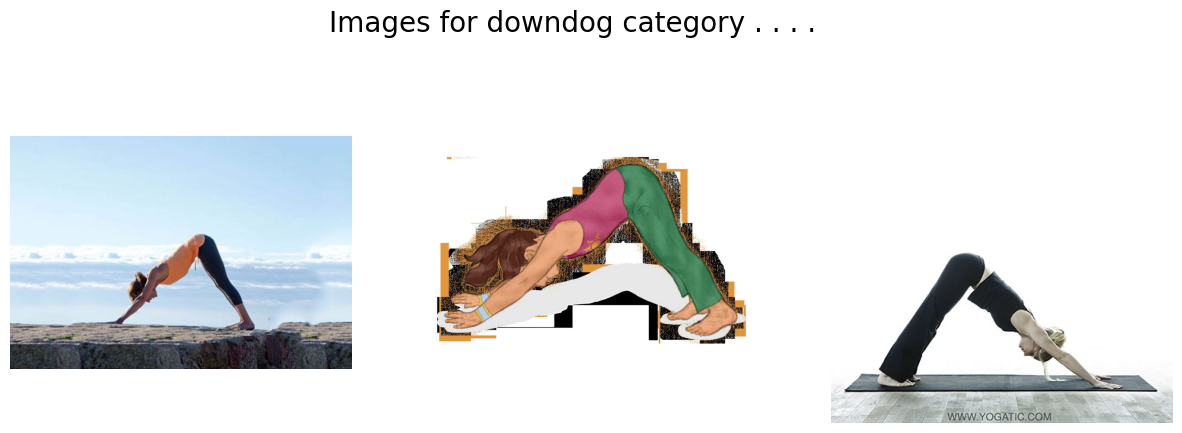

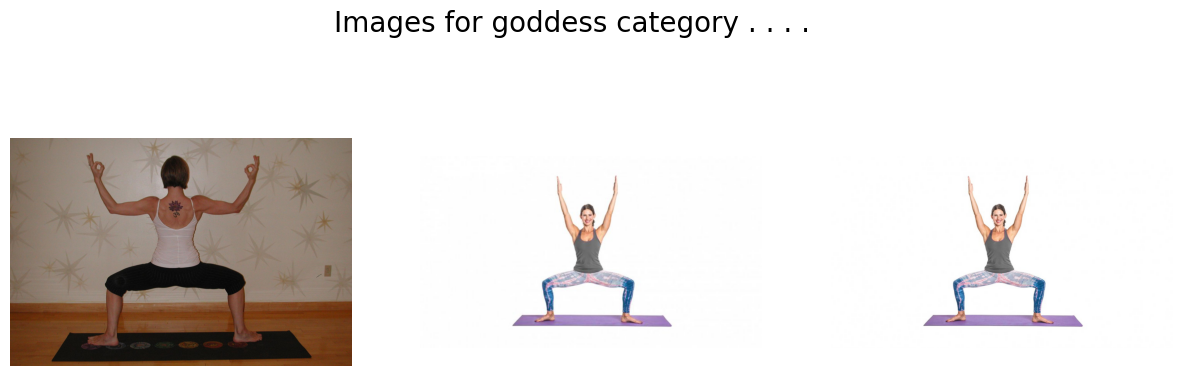

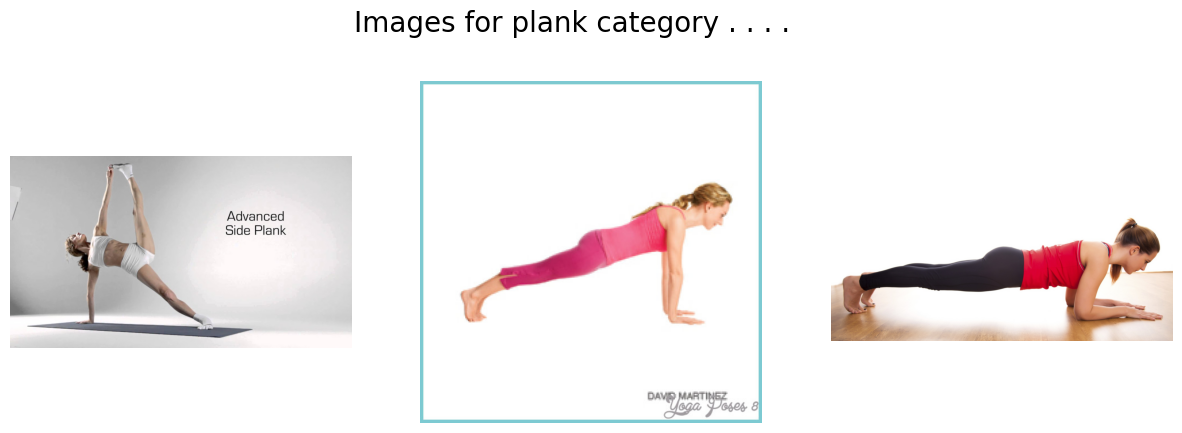

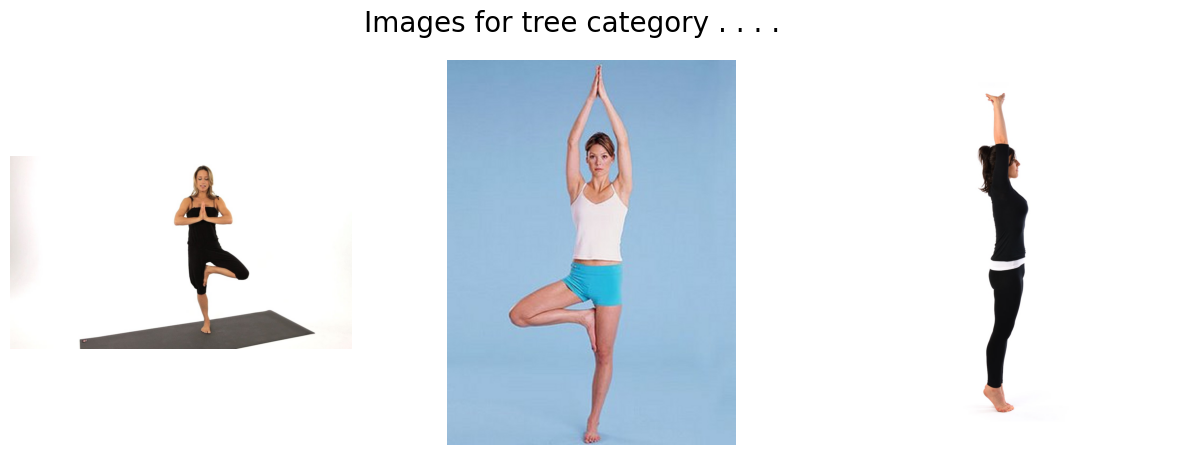

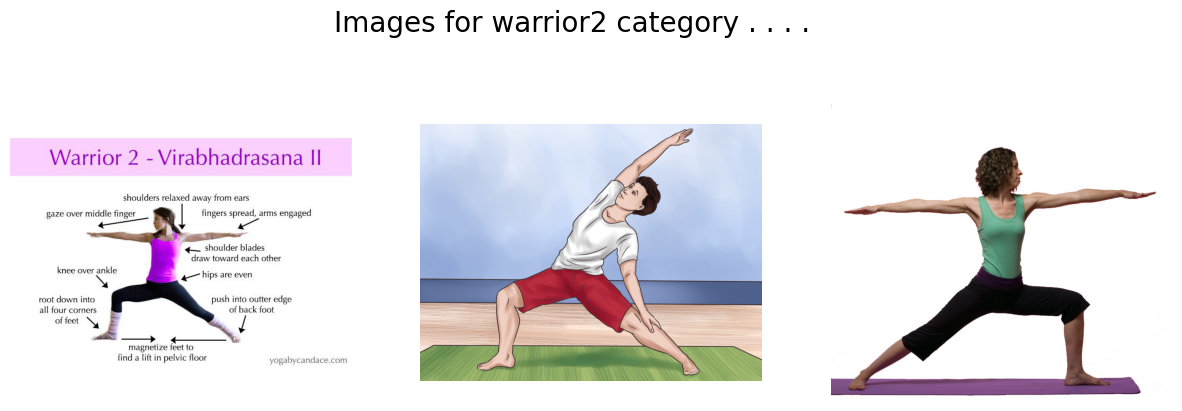

In [65]:
for pose in class_names:
    image_dir = f'{validdir}/{pose}'
    images = os.listdir(image_dir)
 
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Images for {pose} category . . . .', fontsize=20)
 
    for i in range(3):
        k = np.random.randint(0, len(images))
        img = np.array(Image.open(f'{validdir}/{pose}/{images[k]}'))
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.show()

##                                  Data Cleaning:  

##### This function goes through all files in the yoga folder, and transfer all the files which are not a "JPG" type to JPG files

In [7]:
def other_to_jpg(basedir):
    for foldername in os.listdir(basedir):
        folder_path = (basedir+'/' + foldername)
        print("here"+folder_path)
        for filename in os.listdir(folder_path):
            extension = os.path.splitext(filename)[1]
            if extension != ".jpg":
                img_path = os.path.join(folder_path, filename)
                img = Image.open(img_path)
                if not img.mode == 'RGB':
                    img = img.convert('RGB')
                img.save(os.path.splitext(img_path)[0] + ".jpg")
                os.remove(img_path)
                img.close()
    print("All other Files Converted to JPG")

#####  This function goes through all files in the yoga folder, checks if each file is a valid image, and removes corrupted files.<br>
 

In [8]:
def removeCorruptedImages(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path,filename))
            img.verify() 
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove(os.path.join(path,filename))

In [9]:
other_to_jpg(traindir)
other_to_jpg(validdir)

hereC:/Users/DHIBI/Desktop/DATASET/TRAIN/downdog
hereC:/Users/DHIBI/Desktop/DATASET/TRAIN/goddess
hereC:/Users/DHIBI/Desktop/DATASET/TRAIN/plank
hereC:/Users/DHIBI/Desktop/DATASET/TRAIN/tree
hereC:/Users/DHIBI/Desktop/DATASET/TRAIN/warrior2
All other Files Converted to JPG
hereC:/Users/DHIBI/Desktop/DATASET/TEST/downdog
hereC:/Users/DHIBI/Desktop/DATASET/TEST/goddess
hereC:/Users/DHIBI/Desktop/DATASET/TEST/plank
hereC:/Users/DHIBI/Desktop/DATASET/TEST/tree
hereC:/Users/DHIBI/Desktop/DATASET/TEST/warrior2
All other Files Converted to JPG


In [10]:
for i in class_names:
    removeCorruptedImages(os.path.join(traindir,i))

In [11]:
for i in class_names:
    removeCorruptedImages(os.path.join(validdir,i))

##### No corrupted file detected.<br>
 

## DATA AUGMENTATION

###  This code is creating an instance of the ImageDataGenerator class from the tensorflow.keras.preprocessing.image module.<br>
 


imageDataGenerator is a tool used for image data preprocessing and augmentation in deep learning models.

The arguments provided to the ImageDataGenerator constructor are:



##### rescale: a value used for rescaling the pixel values of the images. Here, each pixel value will be divided by 255, resulting in a range of pixel values between 0 and 1.

##### shear_range: the range of shearing angles to apply to the images, in radians.

##### zoom_range: the range of zoom values to apply to the images. A zoom value of 0.2 means the images can be zoomed in up to 20% and zoomed out up to 20%.

##### horizontal_flip: a boolean value indicating whether to randomly flip the images horizontally.
##### These arguments are used to define the different types of data augmentation that will be applied to the images during the training process of a deep learning model.

In [77]:
# create an instance of the data generator for train dataset
train_datagen = ImageDataGenerator(
        rotation_range=20,  # randomly rotate the image up to 20 degrees
        width_shift_range=0.1,  # randomly shift the image horizontally up to 10%
        height_shift_range=0.1,  # randomly shift the image vertically up to 10%
        horizontal_flip=True,  # randomly flip the image horizontally
        fill_mode='nearest')  # fill the pixel values using the nearest neighbor algorithm if needed

# create an instance of the data generator for test dataset
test_datagen = ImageDataGenerator()

In [78]:
train_data = train_datagen.flow_from_directory(
        traindir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')



Found 1064 images belonging to 5 classes.


In [79]:
# load and preprocess the test images
test_data = test_datagen.flow_from_directory(
        validdir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 458 images belonging to 5 classes.


In [ ]:
# fit the train data generator on the training data
train_datagen.fit(train_data)


In [12]:
IMAGE_SIZE = (150,150)

def load_data():
   
    datasets = [traindir , validdir]#a list of directories that contain the image data to be loaded.
    output = []   ##  A list to hold the loaded image data
    
    # Iterate through the training and testing set.
    for dataset in datasets:
        
        images = [] 
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each Subfolder corresponding to a category  
        for folder in os.listdir(dataset):
         
        ###For each directory, the function loads all images from the subfolders representing each category of images
            label = class_names_label[folder]
            ## function "class_names_label" used to map each category name to a numerical label
            
            
            ##The function then loops through each subfolder and its contents using the os library
            # Iterate through each image in our folder
            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
              
                # Image path should be obtained
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
     ##For each image, we read the image using OpenCV, resizes the image, and appends it to a list named "images"
                image = cv.imread(img_path)
    #This is important when using OpenCV with other image processing libraries and tools that use RGB as their 
    #default color space, to avoid any color space inconsistencies that may arise.
                image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                image = cv.resize(image, IMAGE_SIZE) 
                
                
    ##The corresponding label for the image is obtained from the dictionary, and it is appended to a list named "labels"
                # Append the image along with its label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
    ## "images" and "labels" lists are converted to NumPy arrays and shuffled using the "shuffle" function.
    
    #The purpose of shuffling the data is to avoid any bias or patterns in the order of the data during training. 
    #This helps the model to learn the features of the images more effectively by avoiding any accidental correlations 
    #between adjacent images.
        images, labels = shuffle(images, labels)
        
    ##The shuffled "images" and "labels" arrays are appended as a tuple to the "output" list.
        output.append((images, labels))
    return output
# output is a list of tuples, where each tuple contains two NumPy arrays: one array containing the image data, and the other containing the corresponding labels

In [13]:
TRAIN_SPLIT = 0.7  # set the value of TRAIN_SPLIT to 0.7 (70% train, 30% test)

code that uses TRAIN_SPLIT

###### train_images, train_labels, test_images, and test_labels will contain the image and label data for the training and test sets, respectively

In [14]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/DHIBI/Desktop/DATASET/TRAIN


100%|████████████████████████████████████████████████████████████████████████████████| 249/249 [00:05<00:00, 43.24it/s]


Loading C:/Users/DHIBI/Desktop/DATASET/TEST


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:02<00:00, 41.54it/s]


In [84]:
train_images.shape

(1064, 150, 150, 3)

In [85]:
test_images.shape

(458, 150, 150, 3)

In [86]:
train_labels

array([3, 4, 3, ..., 2, 1, 3])

# A visualization of the distribution of images among different classes in the training and testing sets

 train_counts and test_counts are assigned to the corresponding counts of images for each class in the train and test sets<br>
 The "_" variable is used to discard the unique values

In [15]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
#  he NumPy unique function is used to find the unique values and their corresponding counts in the training and test sets of labels

In [88]:
train_counts

array([221, 175, 260, 159, 249], dtype=int64)

In [89]:
test_counts

array([ 94,  77, 110,  68, 109], dtype=int64)

<AxesSubplot:>

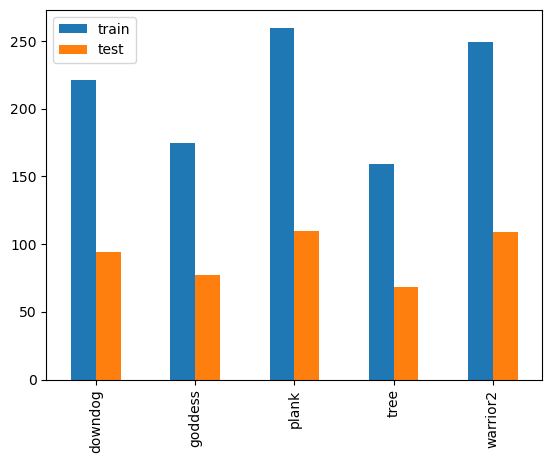

In [90]:
pd.DataFrame({'train': train_counts,'test': test_counts}, index=class_names).plot.bar()
##   The plot.bar() is called to create a bar chart showing the distribution of images
##   among different classes in the training and test sets. 

#### Each bar represents a class, and the height of the bar represents the number of images belonging to that class. The chart has two groups of bars, one for the training set and one for the test set.

# Data Modeling & Model Evaluation:<br>


By dividing each pixel value by 255.0, the pixel values are scaled to a range between 0 and 1. This ensures that all pixel values fall within a similar range and prevents any one feature from dominating the others during training.

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

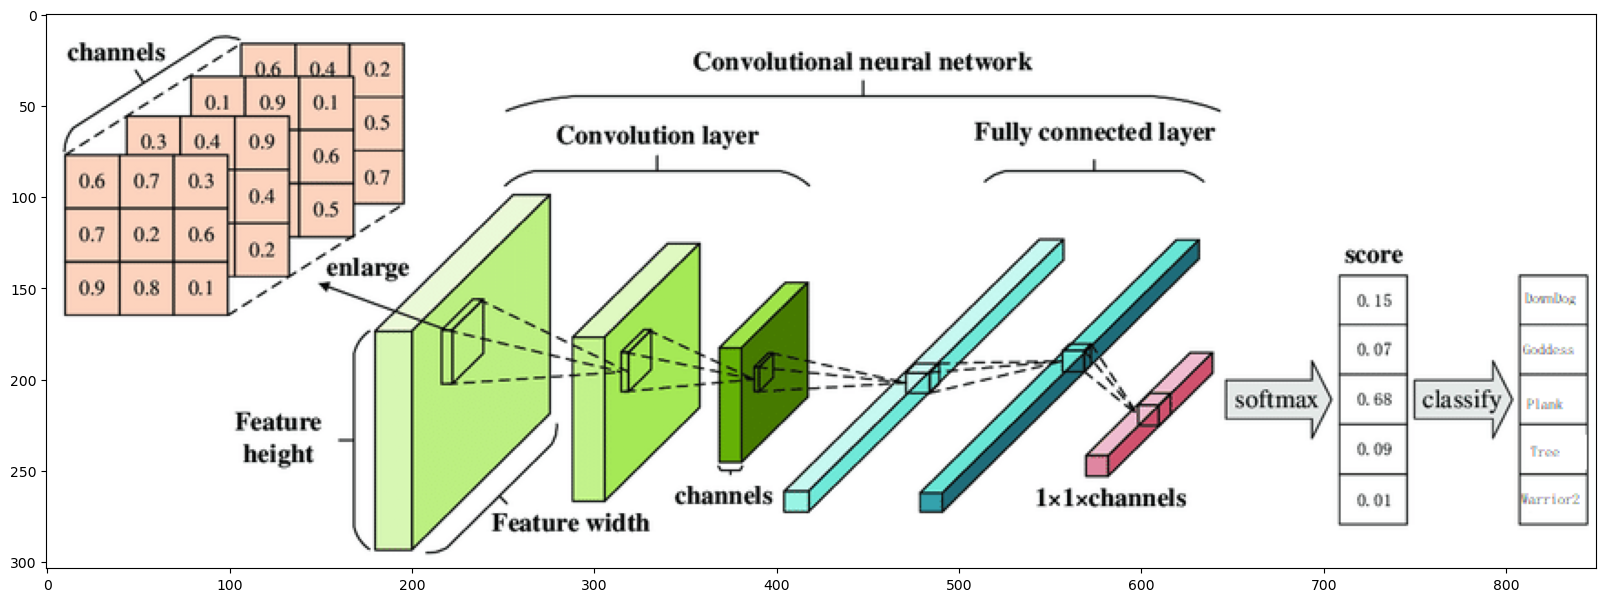

In [92]:
import matplotlib.image as mpimg

img = mpimg.imread(r'C:\Users\AHMED\Downloads\arch.png')
fig, ax = plt.subplots()
fig.set_size_inches(20, 16)
plt.imshow(img)
plt.show()

# The convolutional neural network (ConvNet) model for image classification from data.

In [165]:
model= Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

This CNN model takes 150x150 pixel images with 3 color channels as input, applies a convolutional layer with 32 filters of 5x5 pixels and a ReLU activation function, and then applies a 2D pooling layer to reduce the size of the output image. This model can be used for image classification tasks.


In [166]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_36 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# n+2p-f+1

#### 150+0-3+1=148

In [167]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [168]:
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [169]:
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [170]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_36 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 activation_37 (Activation)  (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                 

In [171]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))

In [172]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 activation_36 (Activation)  (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 activation_37 (Activation)  (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                 

In [173]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# use the augmented data for training
model.fit_generator(
        train_datagen.flow(train_data, epochs=15),
        steps_per_epoch=len(train_data),
        epochs=15,
        validation_data=test_data,
        validation_steps=len(test_data))

In [174]:
history = model.fit(train_images, train_labels,validation_data = (test_images, test_labels), batch_size = 28, epochs=15, validation_split = 0.3)

Epoch 1/15
38/38 [==============================] - 17s 424ms/step - loss: 1.6068 - accuracy: 0.2481 - val_loss: 1.5805 - val_accuracy: 0.2402
Epoch 2/15
38/38 [==============================] - 15s 409ms/step - loss: 1.5327 - accuracy: 0.3214 - val_loss: 1.3501 - val_accuracy: 0.4541
Epoch 3/15
38/38 [==============================] - 16s 414ms/step - loss: 1.3444 - accuracy: 0.4690 - val_loss: 0.9071 - val_accuracy: 0.6703
Epoch 4/15
38/38 [==============================] - 16s 412ms/step - loss: 1.1034 - accuracy: 0.5761 - val_loss: 0.6626 - val_accuracy: 0.7882
Epoch 5/15
38/38 [==============================] - 15s 404ms/step - loss: 0.8976 - accuracy: 0.6654 - val_loss: 0.5321 - val_accuracy: 0.8493
Epoch 6/15
38/38 [==============================] - 15s 406ms/step - loss: 0.7614 - accuracy: 0.7190 - val_loss: 0.4762 - val_accuracy: 0.8472
Epoch 7/15
38/38 [==============================] - 16s 434ms/step - loss: 0.6535 - accuracy: 0.7462 - val_loss: 0.4111 - val_accuracy: 0.8450

# To visualize how our model is performing, we plot the accuracy and the loss during the training


In [175]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

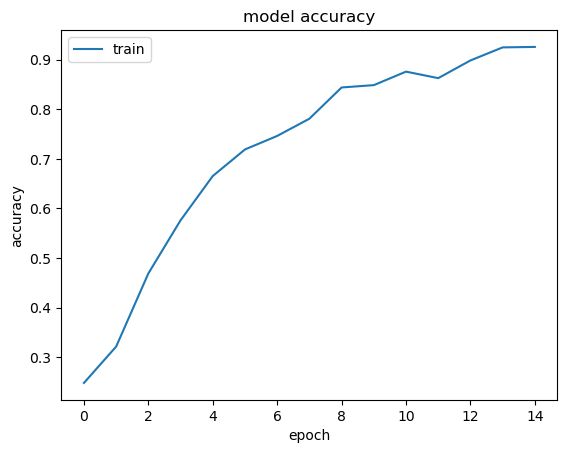

In [176]:
plt. plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")

plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

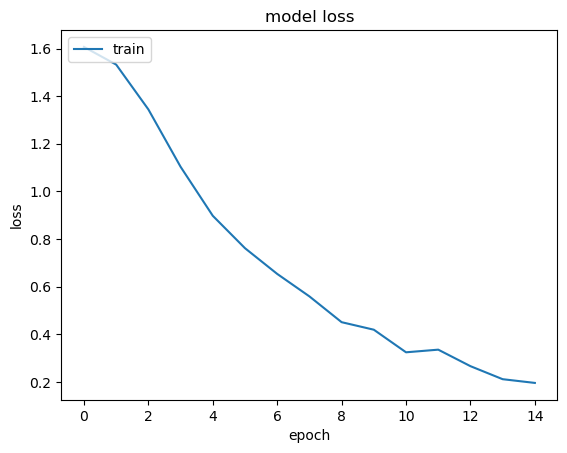

In [177]:
plt. plot(history.history['loss'])
plt.title('model loss')
plt.ylabel("loss")

plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [178]:
def plot_performance(history):
    fig = plt.figure(figsize=(15,8))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "TRAIN ACC")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "TEST ACC")
    plt.title("Training_accuracy vs Testing_accuracy")
    plt.ylabel("ACCURACY")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss_function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "TRAIN LOSS")
    plt.plot(history.history['val_loss'], 'ro--', label = "TEST LOSS")
    plt.title("Training_loss vs Testing_loss")
    plt.ylabel("LOSS")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

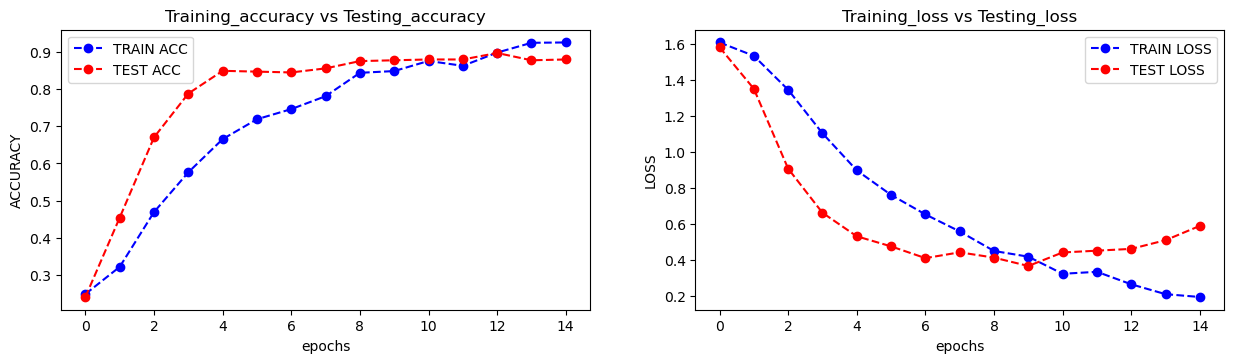

In [179]:
plot_performance(history)

#### The plot shows that The model is not perfect as we can clearly observe the Validation loss slightly flattening though the training loss is going down and the accuracy of the model is improving.<br>


## Reason could be insufficient training data and hence it could be improved by adding more training data

In [185]:
test_loss = model.evaluate(test_images, test_labels)

15/15 [==============================] - 1s 94ms/step - loss: 0.5899 - accuracy: 0.8799


# We now make predictions on the test data set.

In [186]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions,axis=1)  
# np.argmax is used since each prediction would be an array of probabilities and we need to pick the max value
    
     
pred_labels

15/15 [==============================] - 2s 102ms/step


array([0, 0, 4, 1, 4, 1, 0, 0, 2, 3, 2, 2, 2, 1, 2, 0, 4, 4, 2, 1, 1, 4,
       3, 2, 0, 0, 4, 1, 2, 2, 0, 2, 0, 3, 0, 3, 0, 1, 4, 4, 3, 4, 1, 3,
       4, 0, 4, 4, 2, 0, 4, 2, 4, 2, 2, 2, 0, 4, 2, 4, 3, 0, 2, 4, 1, 4,
       2, 4, 0, 4, 1, 2, 0, 3, 4, 4, 0, 2, 1, 2, 2, 0, 4, 4, 1, 2, 4, 4,
       0, 0, 1, 2, 4, 4, 4, 4, 3, 2, 2, 2, 4, 4, 1, 4, 1, 4, 0, 4, 4, 4,
       4, 3, 2, 4, 2, 0, 2, 0, 4, 2, 4, 2, 1, 4, 4, 1, 4, 1, 1, 2, 0, 2,
       1, 0, 3, 3, 2, 4, 1, 2, 4, 2, 0, 3, 0, 2, 3, 1, 2, 2, 4, 1, 1, 0,
       0, 0, 4, 0, 3, 0, 0, 2, 2, 4, 0, 1, 2, 4, 2, 0, 4, 3, 0, 2, 4, 2,
       4, 2, 4, 2, 2, 4, 3, 4, 3, 4, 0, 0, 0, 0, 2, 2, 4, 0, 2, 0, 2, 4,
       3, 0, 4, 0, 3, 2, 4, 2, 3, 0, 4, 4, 0, 2, 4, 4, 4, 3, 0, 3, 0, 2,
       0, 2, 1, 1, 1, 1, 3, 0, 4, 2, 4, 0, 2, 3, 0, 3, 1, 4, 4, 0, 4, 3,
       1, 0, 4, 0, 2, 4, 1, 2, 0, 3, 4, 4, 3, 4, 3, 0, 4, 3, 2, 0, 4, 4,
       4, 1, 1, 0, 4, 4, 2, 2, 4, 1, 4, 0, 0, 1, 4, 4, 0, 3, 2, 0, 0, 1,
       4, 4, 2, 2, 3, 0, 1, 2, 0, 2, 4, 0, 0, 3, 2,

# Plotting the images along with their actual class and predicted class would give us a proper idea about how our model is making predictions.

In[50]:

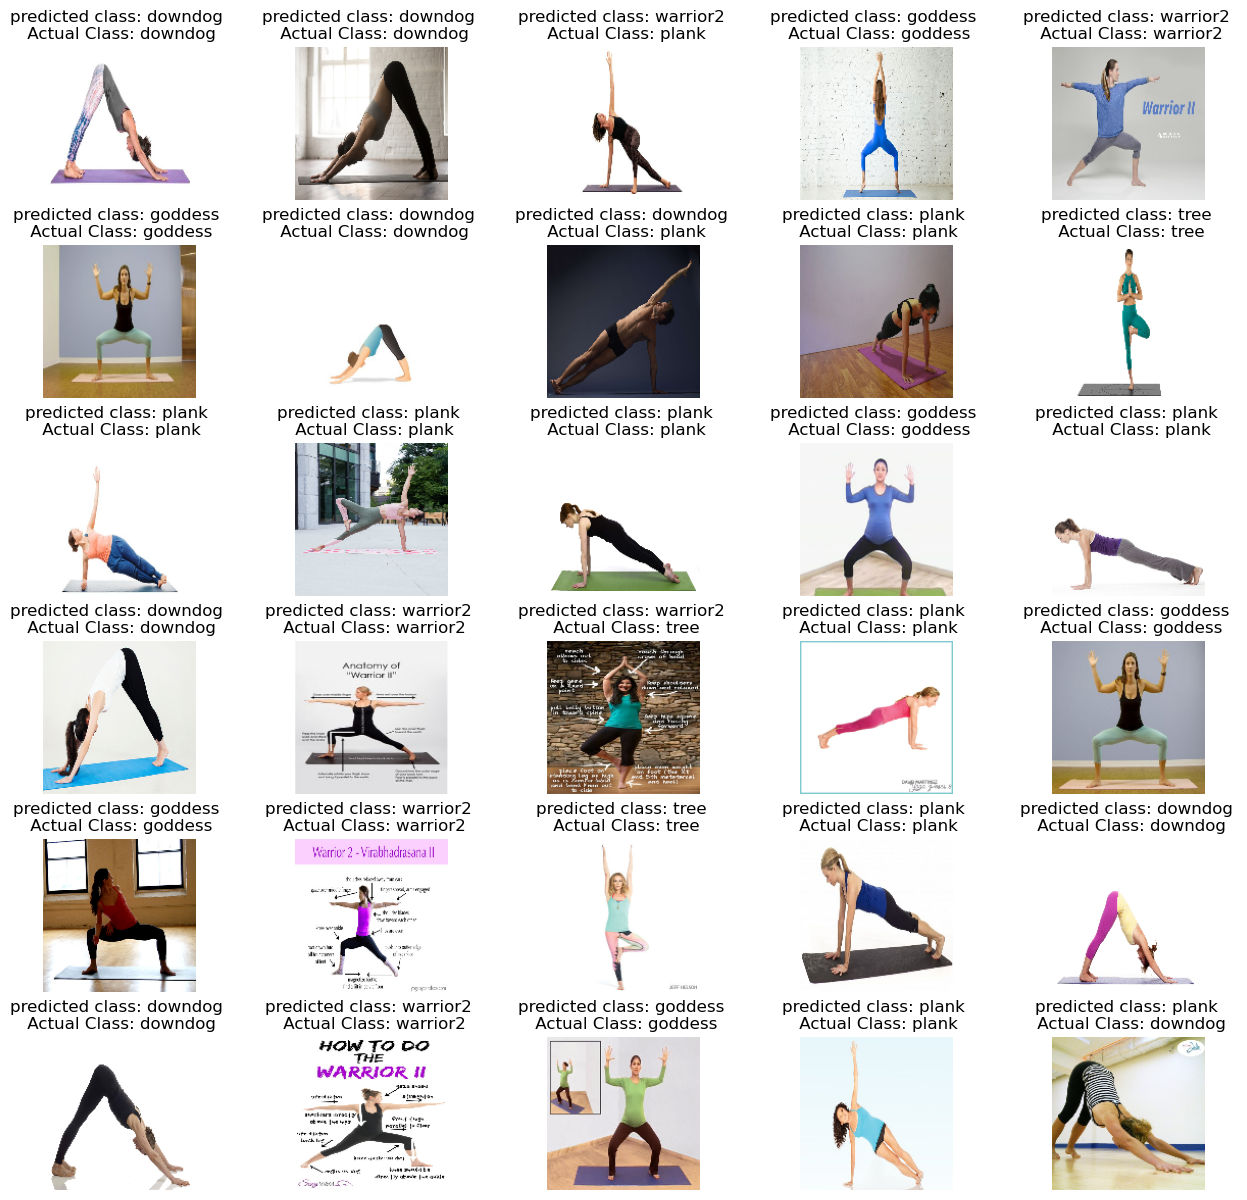

In [188]:
fig, ax = plt.subplots(6,5, figsize = (15,15))
ax = ax.ravel()
for i in range(0,30):  
    ax[i].imshow(test_images[i])
    ax[i].set_title(f"predicted class: {class_names[pred_labels[i]]} \n Actual Class: {class_names[test_labels[i]]}")
    ax[i].axis('off')
plt.subplots_adjust(wspace=0.65)

# We took this sample of images to show the result of modeling applied on our dataset

In [197]:
Y_pred = model.predict(test_images)
Y_pred = np.argmax(Y_pred, axis=1)

15/15 [==============================] - 1s 58ms/step


In [201]:
Y_pred.shape

(458,)

In [203]:
test_labels.shape

(458,)

In [204]:
metrics.confusion_matrix(Y_val, Y_pred)

array([[ 87,   0,   5,   0,   2],
       [  4,  50,   3,   2,  18],
       [  4,   0,  99,   0,   7],
       [  2,   1,   0,  62,   3],
       [  0,   4,   0,   0, 105]], dtype=int64)

In [207]:
print(metrics.classification_report(test_labels, Y_pred,
									target_names=class_names))

              precision    recall  f1-score   support

     downdog       0.90      0.93      0.91        94
     goddess       0.91      0.65      0.76        77
       plank       0.93      0.90      0.91       110
        tree       0.97      0.91      0.94        68
    warrior2       0.78      0.96      0.86       109

    accuracy                           0.88       458
   macro avg       0.90      0.87      0.88       458
weighted avg       0.89      0.88      0.88       458



# Transfert Learning

In [250]:
import tensorflow.keras as keras

In [245]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
	input_shape = (150, 150, 3),
	weights = 'imagenet',
	include_top = False #lets you select if you want the final dense layers or not.
)
#The main idea of the Inception module is that of running multiple operations (pooling, convolution)
# with multiple filter sizes (3x3, 5x5…) in parallel 

87910968/87910968 [==============================] - 48s 1us/step


In [246]:
len(pre_trained_model.layers)


311

In [247]:
for layer in pre_trained_model.layers:
 layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')# Mixed7 is one of the layers in the inception network 
                                                  #whose outputs we will use to build the classifier.
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 7, 7, 768)


In [251]:
x = layers.Flatten()(last_output)

x = layers.Dense(256,activation='relu')(x)
x = layers.BatchNormalization()(x)

x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)

output = layers.Dense(3, activation='softmax')(x)

model = keras.Model(pre_trained_model.input, output)


In [253]:
model.compile(
	optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)


In [254]:

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('val_accuracy') > 0.90:
      print('\n Validation accuracy has reached upto 90%\
      so, stopping further training.')
      self.model.stop_training = True
 
es = EarlyStopping(patience = 3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)
 
lr = ReduceLROnPlateau(monitor = 'val_loss',
                       patience = 2,
                       factor = 0.5,
                       verbose = 1)

In [257]:
history = model.fit(train_images, train_labels,
					validation_data = (test_images, test_labels),
					batch_size = 28,
					epochs = 15,
					verbose = 3,
					callbacks = [es, lr, myCallback()])

Epoch 1/15


ValueError: in user code:

    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\AHMED\anaconda3\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (28, 1) and (28, 3) are incompatible


# VGG

In [17]:
from tensorflow.keras.layers import MaxPool2D

filers x4 for a VGG-16 version(heavy version) 56M params

In [18]:
model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [19]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [20]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [21]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [22]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [23]:
model.add(Flatten())
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=5, activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                    

In [31]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(train_images, train_labels,validation_data = (test_images, test_labels), batch_size = 100, epochs=10, validation_split = 0.3)

Epoch 1/10
11/11 [==============================] - 62s 5s/step - loss: 1.5953 - accuracy: 0.2152 - val_loss: 1.5976 - val_accuracy: 0.2402
Epoch 2/10
11/11 [==============================] - 62s 6s/step - loss: 1.5971 - accuracy: 0.2406 - val_loss: 1.6045 - val_accuracy: 0.2380
Epoch 3/10
11/11 [==============================] - 60s 6s/step - loss: 1.6345 - accuracy: 0.2303 - val_loss: 1.5944 - val_accuracy: 0.2402
Epoch 4/10
11/11 [==============================] - 60s 5s/step - loss: 1.6270 - accuracy: 0.2293 - val_loss: 1.6502 - val_accuracy: 0.1485
Epoch 5/10
11/11 [==============================] - 62s 6s/step - loss: 1.5980 - accuracy: 0.2368 - val_loss: 1.5937 - val_accuracy: 0.2402
Epoch 6/10
11/11 [==============================] - 59s 5s/step - loss: 1.5950 - accuracy: 0.2444 - val_loss: 1.5924 - val_accuracy: 0.2402
Epoch 7/10
11/11 [==============================] - 60s 6s/step - loss: 1.5943 - accuracy: 0.2444 - val_loss: 1.5923 - val_accuracy: 0.2402
Epoch 8/10
11/11 [==

# To visualize how our model is performing, we plot the accuracy and the loss during the training


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

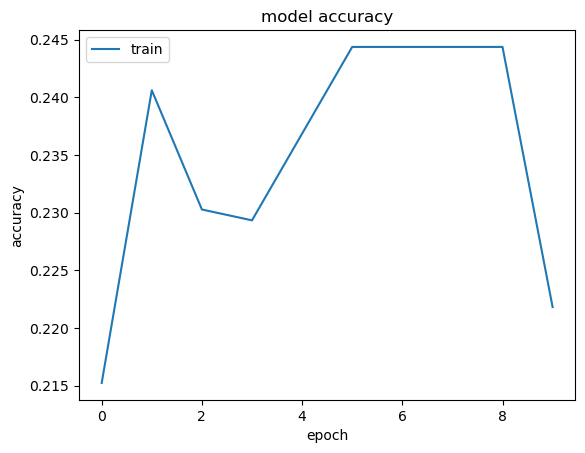

In [34]:
plt. plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")

plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

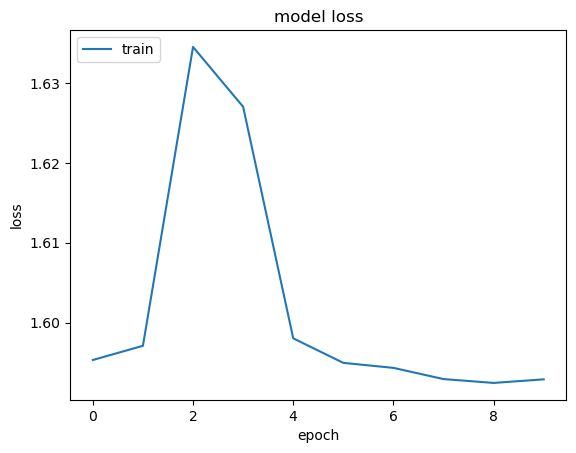

In [35]:
plt. plot(history.history['loss'])
plt.title('model loss')
plt.ylabel("loss")

plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [36]:
def plot_performance(history):
    fig = plt.figure(figsize=(15,8))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "TRAIN ACC")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "TEST ACC")
    plt.title("Training_accuracy vs Testing_accuracy")
    plt.ylabel("ACCURACY")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss_function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "TRAIN LOSS")
    plt.plot(history.history['val_loss'], 'ro--', label = "TEST LOSS")
    plt.title("Training_loss vs Testing_loss")
    plt.ylabel("LOSS")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

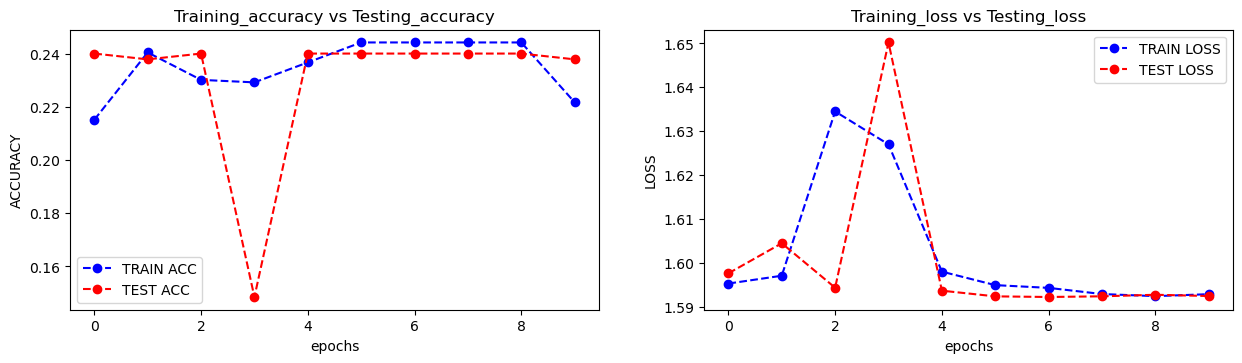

In [37]:
plot_performance(history)

#### The plot shows that The model is not perfect as we can clearly observe the Validation loss slightly flattening though the training loss is going down and the accuracy of the model is improving.<br>


## Reason could be insufficient training data and hence it could be improved by adding more training data

In [38]:
test_loss = model.evaluate(test_images, test_labels)

15/15 [==============================] - 4s 289ms/step - loss: 1.5925 - accuracy: 0.2380


## CONVNet is better

Recent comparisons between Convolutional Neural Networks (CNNs) and Global Vector (GV) models have shown that CNNs consistently outperform GV models in terms of accuracy, particularly on trained datasets. In fact, the accuracy of GV models tends to be significantly lower than that of CNNs in these comparisons. This highlights the superiority of CNNs as a powerful tool for image recognition and classification tasks, and emphasizes the importance of using appropriate models for specific applications.